In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data
data = pd.read_csv('../dataset/dataset.csv')

data


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


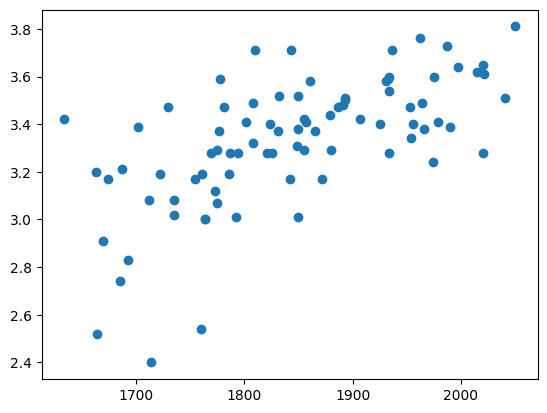

In [4]:
# Plot the data
plt.scatter(data['SAT'], data['GPA'])

In [ ]:
# Create the loss function
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]['SAT']
        y = points.iloc[i]['GPA']
        
        total_error += (y - (m * x + b)) ** 2
        
    return total_error / len(points)

In [23]:
# Create the gradient descent function
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i]['SAT']
        y = points.iloc[i]['GPA']
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - L * m_gradient / n
    b = b_now - L * b_gradient / n
    
    return m, b

Epoch 0: Loss = 36.218263851719435
Epoch 10000: Loss = 3.6573568836268677
Epoch 20000: Loss = 3.657356581340171
Epoch 30000: Loss = 3.657356279058024
Epoch 40000: Loss = 3.6573559767804285
Epoch 50000: Loss = 3.657355674507379
Epoch 60000: Loss = 3.6573553722388796
Epoch 70000: Loss = 3.657355069974932
Epoch 80000: Loss = 3.657354767715531
Epoch 90000: Loss = 3.6573544654606818


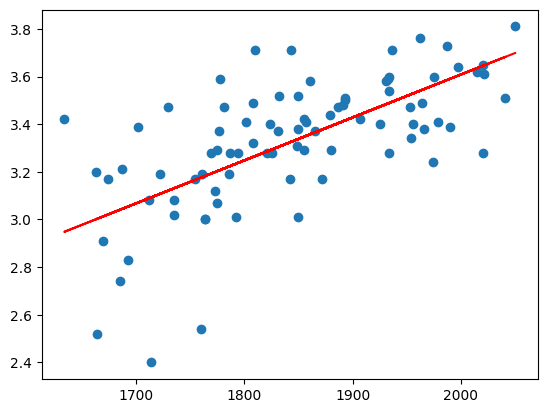

In [30]:
m = 0
b = 0
L = 0.00001
epochs = 100000

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 10000 == 0:
        print(f'Epoch {i}: Loss = {loss_function(m, b, data)}')

m, b

plt.scatter(data['SAT'], data['GPA'])
plt.plot(data['SAT'], m * data['SAT'] + b, color='red')